In [1]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 15 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 3s (1,622 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [2]:
!which tesseract

/usr/bin/tesseract


In [3]:
!pip install pytesseract
!pip install pypng
!pip install gTTS

  Created wheel for pytesseract: filename=pytesseract-0.3.7-py2.py3-none-any.whl size=13945 sha256=b0dd70f4c02558c490d8db787f68c1e1307f9a1b44812a2118ca6be2457e5f2d
  Stored in directory: /root/.cache/pip/wheels/81/20/7e/1dd0daad1575d5260916bb1e9781246430647adaef4b3ca3b3
Successfully built pytesseract
     |████████████████████████████████| 655kB 5.2MB/s 
  Created wheel for pypng: filename=pypng-0.0.20-cp36-none-any.whl size=67161 sha256=8c6a32149a9b943f8492ff57046f7c55f3fc211178299bac5b5ed4c51b00dd74
  Stored in directory: /root/.cache/pip/wheels/41/6b/ef/0493b536b6d4722c2ae9486691b1d49b922b9877922beeabb3
Successfully built pypng


In [4]:
# text recognition
import cv2
import pytesseract
from google.colab.patches import cv2_imshow
from gtts import gTTS
from IPython.display import Audio
import os

# read image
im = cv2.imread('/content/drive/MyDrive/example.png')

In [5]:
# preprocessing functions
# gray scale
def grayConvert(img):
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cv2.imwrite(r"./preprocess/img_gray.png",img)
    return img

# blur the image
def blurConvert(img) :
    img_blur = cv2.GaussianBlur(img,(5,5),0)
    cv2.imwrite(r"./preprocess/img_blur.png",img)    
    return img_blur

# threshold the image 
def threshold(img):
    #pixels with value below 100 are turned black (0) and those with higher value are turned white (255)
    img = cv2.threshold(img, 100, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY)[1]    
    cv2.imwrite(r"./preprocess/img_threshold.png",img)
    return img

In [6]:
# text detection
def contours_text(orig, img, contours):
    for cnt in contours: 
        x, y, w, h = cv2.boundingRect(cnt) 

        # Drawing a rectangle on copied image 
        rect = cv2.rectangle(orig, (x, y), (x + w, y + h), (0, 255, 255), 2) 
        
        cv2_imshow(rect)
        cv2.waitKey()

        # Cropping the text block for giving input to OCR 
        cropped = orig[y:y + h, x:x + w] 

        # Apply OCR on the cropped image 
        config = ('-l eng --oem 1 --psm 3')
        text = pytesseract.image_to_string(cropped, config=config) 

        return text

In [7]:
#perform the necessary preprocessing using the earlier defined functions and get the contours
grayImg = grayConvert(im)
blurImg = blurConvert(grayImg)
threshedImg = threshold(blurImg)
contours, _ = cv2.findContours(threshedImg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

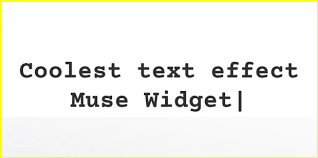

 

 

Coolest text effect
Muse Widget |

 

 



In [8]:
#get the text
text = contours_text(im, threshedImg, contours)
print(text)

In [9]:
language = 'en'

#get speech after passing the text and language to the engine
speech = gTTS(text = text, lang=language, slow=False)

#save the speech in an mp3 for playback
speech.save("speech.mp3")

sound_file = 'speech.mp3'

#playback the speech
Audio(sound_file, autoplay=True)